# Scientific computing

- [Scientific computing](day2/scicomp.ipynb):
    - [Numpy](#Numpy): advanced array operations
    - Scipy introduction: from linear algebra to image analisys
    - Simpy: symbolic math
    - Networks with networkx: centrality computation
    - Fitting a curve, cleaning a signal.

https://docs.scipy.org/doc/numpy/user/basics.html

Numpy: advanced array operations

Scipy introduction: from linear algebra to image analisys

Simpy: symbolic math

Further reading:

- [https://scipy-lectures.github.io/index.html](https://scipy-lectures.github.io/index.html) - served as my main inspiration source for this chapter.
- [http://docs.scipy.org/doc/scipy-0.15.1/reference/](http://docs.scipy.org/doc/scipy-0.15.1/reference/) - The Scipy reference guide, containing a very good tutorial for each of the libraries.
- [http://www.scipy.org/topical-software.html](http://www.scipy.org/topical-software.html) This page is containing links to some of the most common Python modules. However it is far from complete, for example PIL, a library commonly used in image processing in Python, is not listed.


## Numpy

Most of the time when doing scientific computing speed is critical. There are several reasons Numpy is much faster than standard Python. The most important is that Numpy enforces strong typing, while Python is a dynamic typed language. That translates in Numpy using less heap space for representing data. Because array operations are the core of scientific computing, we will look at this library in greater depth.

In [1]:
import numpy as np
L = range(1000)
%timeit [i**2 for i in L]
a = np.arange(1000)
%timeit a**2
print(type(L[1]))
print(a.dtype)

292 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.55 µs ± 27.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
<class 'int'>
int64


In [2]:
import numpy as np
##Get help!
#np.lookfor('create array')
#np.array?
#np.arr*?

In [3]:
a = np.array([0, 1, 2, 3])
b = np.array([[0, 1, 2], [3, 4, 5]])
c = np.array([[[1], [2]], [[3], [4]]])
print(a)
print(b)
print(b.shape)

[0 1 2 3]
[[0 1 2]
 [3 4 5]]
(2, 3)


#### Data types

There are 5 basic numerical types representing booleans (bool), integers (int), unsigned integers (uint) floating point (float) and complex. Those with numbers in their name indicate the bitsize of the type (i.e. how many bits are needed to represent a single value in memory). 

In [13]:
import numpy as np
x = np.float32(1.0)
print(x)

y = np.int_([1,2,4])
print(y)

z = np.arange(3, dtype=np.uint8)
print(z)

print(np.array([1, 2, 3], dtype='f'))
print(z.astype(float))

print(z.dtype)

d = np.dtype(int)
# d = 1 # question: why does it fail?
d = np.uint8(1)
print(d)

print(np.issubdtype(d, np.integer))


1.0
[1 2 4]
[0 1 2]
[1. 2. 3.]
[0. 1. 2.]
uint8
1
True


#### Array creation

In [19]:
# extrinsic
x = np.array([2,3,1,0])
print(x)
x = np.array([[ 1., 2.], [ 0., 0.], [ 1., 3.]])
print(x)

#intrinsic
b = np.arange(1, 9, 2)
print(b)
c = np.linspace(0, 1, 6)
print(c)

a = np.ones((3, 3))
b = np.zeros((2, 2))
c = np.eye(3)
print("ones, zeros, eyes:")
print(a,"\n", b,"\n",c)

[2 3 1 0]
[[1. 2.]
 [0. 0.]
 [1. 3.]]
[1 3 5 7]
[0.  0.2 0.4 0.6 0.8 1. ]
ones, zeros, eyes:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 
 [[0. 0.]
 [0. 0.]] 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Populating the interactive namespace from numpy and matplotlib
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
[0.67028524 0.23652947 0.05906093 0.7670037 ]
[0.39529507 0.9623851  0.53732409 0.92881803]
[[ 0.85912861 -1.49316881 -0.10966332]
 [ 0.27326255  2.06753881  2.51515191]
 [-0.28055952  0.48805984 -0.60744586]
 [ 0.43257036 -0.44798758  0.45633195]]


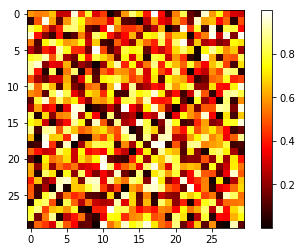

In [22]:
%pylab inline
import matplotlib.pyplot as plt

x = np.diag(np.array([1, 2, 3, 4]))
print(x)
x = np.random.rand(4)       # uniform in [0, 1]
print(x)
x = np.random.rand(4)
print(x)
x = np.random.randn(4,3)      # Gaussian
print(x)
#np.random.seed(1234)
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

In [129]:
# more generators
print(np.linspace(1., 4., 6))
print(np.indices((3,2)))
print(np.arange(35).reshape(5,7))
print(np.triu(np.ones((3, 3)), 1))
print(np.triu(np.ones((3, 3)), 2))
print(np.tile(np.arange(0, 40, 10), (3, 1)))

[1.  1.6 2.2 2.8 3.4 4. ]
[[[0 0]
  [1 1]
  [2 2]]

 [[0 1]
  [0 1]
  [0 1]]]
[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]]
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[ 0 10 20 30]
 [ 0 10 20 30]
 [ 0 10 20 30]]


#### Indexing, slicing and selection

In [26]:
a = np.arange(10)
print(a[0], a[2], a[-1], a[-3])
print(a[2:5], a[2:], a[:-2], a[::2], a[2::2])

0 2 9 7
[2 3 4] [2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7] [0 2 4 6 8] [2 4 6 8]


In [37]:
a = np.diag(np.arange(3))
print(a)
print(a[1, 1])

a[2, 1] = 10 # !third line, !second column
print("\na = \n",a)
print("\na[1] = \n",a[1])
print("\na[:,1], a[1,:] = \n",a[:,1], a[1,:])
print("\na[1:,2:] = \n",a[1:,1:])

[[0 0 0]
 [0 1 0]
 [0 0 2]]
1

a = 
 [[ 0  0  0]
 [ 0  1  0]
 [ 0 10  2]]

a[1] = 
 [0 1 0]

a[:,1], a[1,:] = 
 [ 0  1 10] [0 1 0]

a[1:,2:] = 
 [[ 1  0]
 [10  2]]


In [42]:
# array indexes
x = np.arange(10,1,-1)
print(x)
print(x[np.array([3, 3, 1, 8])])
print(x[np.array([3,3,-3,8])])
print(x[np.array([[1,1],[2,3]])])

[10  9  8  7  6  5  4  3  2]
[7 7 9 2]
[7 7 4 2]
[[9 9]
 [8 7]]


In [57]:
a = np.random.randint(0, 20 + 1, 15)
print(a)
print(a%3==0)
print(a[a%3==0])
a[a % 3 == 0] = -1
print(a)

[10  4 10  3  0 14 18 15  7 14 17 19 18 17 15]
[False False False  True  True False  True  True False False False False
  True False  True]
[ 3  0 18 15 18 15]
[10  4 10 -1 -1 14 -1 -1  7 14 17 19 -1 17 -1]


In [59]:
a = np.arange(0, 100, 10)
print(a)
print(a[[2, 3, 2, 4, 2]])
a[[9, 7]] = -100
print(a)

a = np.arange(0,100,10)
idx = np.array([[3,4],[9,7]])
print(a[idx])

[ 0 10 20 30 40 50 60 70 80 90]
[20 30 20 40 20]
[   0   10   20   30   40   50   60 -100   80 -100]
[[30 40]
 [90 70]]


In [46]:
y = np.arange(35).reshape(5,7)
print(y)
print(y[np.array([0,2,4]), np.array([0,1,2])])
# multidimensional arrays have a less intuitive form of indexing
# first value of the resultant array is y[0,0]. The next value is y[2,1], and the last is y[4,2].

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]]
[ 0 15 30]


In [49]:
print(y[np.array([0,2,4]), 1])
print(y[np.array([0,2,4])])

[ 1 15 29]
[[ 0  1  2  3  4  5  6]
 [14 15 16 17 18 19 20]
 [28 29 30 31 32 33 34]]


Task:
- What does this do:

In [53]:
# What does it do?
print(np.arange(0, 51, 10)[:, np.newaxis])
print(np.arange(6))
print(np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis])

[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]
[0 1 2 3 4 5]
[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [6]:
# How does it work?
# Print the primes!
def get_primes():
    primes = np.ones((100,), dtype=bool)
    primes[:2] = 0
    N_max = int(np.sqrt(len(primes)))
    for j in range(2, N_max):
        primes[2*j::j] = 0
    return primes
print(get_primes())


[False False  True  True False  True False  True False False False  True
 False  True False False False  True False  True False False False  True
 False False False False False  True False  True False False False False
 False  True False False False  True False  True False False False  True
 False False False False False  True False False False False False  True
 False  True False False False False False  True False False False  True
 False  True False False False False False  True False False False  True
 False False False False False  True False False False False False False
 False  True False False]


#### Broadcasting, assignment, structured arrays

In [62]:
a = np.arange(10)
b = a[::2]
b[0] = 12
print(a, b)
print(np.may_share_memory(a, b))

a = np.arange(10)
c = a[::2].copy()  # force a copy
c[0] = 12
print(a, c)
print(np.may_share_memory(a, c))

[12  1  2  3  4  5  6  7  8  9] [12  2  4  6  8]
True
[0 1 2 3 4 5 6 7 8 9] [12  2  4  6  8]
False


In [69]:
#Array operations
a = np.array([1, 2, 3, 4])
print("a: ", a)
print("a + 1, 2**a: ", a + 1, 2**a)

b = np.ones(4) + 1
print("a: ",a)
print("b: ",b)
print("a - b, a * b: ", a - b, a * b)

j = np.arange(5)
print ("2**(j + 1) - j: ", 2**(j + 1) - j)

a:  [1 2 3 4]
a + 1, 2**a:  [2 3 4 5] [ 2  4  8 16]
a:  [1 2 3 4]
b:  [2. 2. 2. 2.]
a - b, a * b:  [-1.  0.  1.  2.] [2. 4. 6. 8.]
2**(j + 1) - j:  [ 2  3  6 13 28]


In [72]:
c = np.ones((3, 3))
print("\n2*c + 1: \n", 2*c + 1)
print("\nc * c: \n", c * c)
print("\nc + c: \n", c + c)
print("\nc.dot(c): \n", c.dot(c)) #matrix multiplication!


2*c + 1: 
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]

c * c: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

c + c: 
 [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]

c.dot(c): 
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]]


In [77]:
a = np.arange(5)
print(np.sin(a), np.log(a), np.exp(a))

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ] [      -inf 0.         0.69314718 1.09861229 1.38629436] [ 1.          2.71828183  7.3890561  20.08553692 54.59815003]


/media/sergiu/lappie/programs/miniconda3/envs/pycourse/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [124]:
# shape manipulation

x = np.array([1, 2, 3])
print(x), print()
print(x[:, np.newaxis]), print()
print(x[np.newaxis, :]), print()

[1 2 3]

[[1]
 [2]
 [3]]

[[1 2 3]]



(None, None)

In [127]:
# flatten, reshape
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(a.ravel()), print()

b = a.ravel()
b = b.reshape((2, 3)) #!reshape may return a copy!
print(b)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]

[[1 2 3]
 [4 5 6]]


In [132]:
# open (i.e. not fleshed out) mesh-grid when indexed
x, y = np.ogrid[0:5, 0:5]
print(x)
print(y), print()

# mesh grid (closed)
x, y = np.mgrid[0:5, 0:5]
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]]
[[0 1 2 3 4]]

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [141]:
# Multidimensional transpose matrices

a = np.arange(4*3*2).reshape(4, 3, 2)
print(a), print()

print(a.shape, a[0, 2, 1])
b = a.transpose(1, 2, 0)
print(b.shape, b[2, 1, 0])

[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]

(4, 3, 2) 5
(3, 2, 4) 5


In [144]:
# resizing behaves differently if the array is row-major vs column major
x = np.array([[0, 1], [2, 3]], order='C')
#x = np.array([[0, 1], [2, 3]]
#x = np.array([[0, 1], [2, 3]], order='F')
print(x)
x.resize((2, 1))
print(x)

[[0 1]
 [2 3]]
[[0]
 [1]]


In [151]:
# sorting matrices, "finally"!

a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1) #sorting per row
print(a)
print(b)
a.sort(axis=1)
print(a), print()

a = np.array([4, 3, 1, 2])
j = np.argsort(a)
print(j, a[j]), print()

# sorting structured arrays
# oh, about structured arrays ...
# https://docs.scipy.org/doc/numpy/user/basics.rec.html
a = np.array([('a', 2), ('c', 1)], dtype=[('x', 'S1'), ('y', int)])
print(a)
a.sort(order='y')
print(a)

[[4 3 5]
 [1 2 1]]
[[3 4 5]
 [1 1 2]]
[[3 4 5]
 [1 1 2]]

[2 3 1 0] [1 2 3 4]

[(b'a', 2) (b'c', 1)]
[(b'c', 1) (b'a', 2)]


#### Reductions

In [100]:
x = np.array([1, 2, 3, 4])
print("unidimensional:")
print(x)
print(np.sum(x), x.sum(), x.sum(axis=0))

x = np.array([[1, 1], [2, 2]])
print("multidimensional:")
print(x)
print(x.sum(axis=0))   # columns (first dimension)
print(x[:, 0], x[:, 0].sum()) # column sum, selected column only
print(x.sum(axis=1))  # rows (second dimension)
print(x[0, :], x[0, :].sum()) # row sum, selected column only

unidimensional:
[1 2 3 4]
10 10 10
multidimensional:
[[1 1]
 [2 2]]
[3 3]
[1 2] 3
[2 4]
[1 1] 2


Task: What does it do?

In [105]:
x = np.random.rand(2,2,2)
print(x)
print("\nx.sum(axis=2)[0,1] =", x.sum(axis=2)[0,1])
print("\nx[0,1,:].sum() =", x[0,1,:].sum())

[[[0.20420415 0.28556622]
  [0.32451766 0.95174246]]

 [[0.14594388 0.23950013]
  [0.08366297 0.87672861]]]

x.sum(axis=2)[0,1] = 1.2762601136179088

x[0,1,:].sum() = 1.2762601136179088


In [109]:
x = np.array([1, 3, 2])
print(x)
print(x.min(), x.max(), x.argmin(), x.argmax())

print(np.all([True, True, False]), np.any([True, True, False]))

x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
print(x.mean(), x.std(), np.median(x), np.median(y, axis=-1))

[1 3 2]
1 3 0 1
False True
1.75 0.82915619758885 1.5 [2. 5.]


In [108]:
a = np.zeros((100, 100))
print(np.any(a != 0), np.all(a == a))

a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
print(((a <= b) & (b <= c)).all())

False True
True


Task:
- Replace all values greater than 25 with 9 and all values smaller than 10 with 29.
- Use numpy preferentially!

In [2]:
np.random.seed(100)
x = np.random.uniform(1,50, 20)
x

array([27.62684215, 14.64009987, 21.80136195, 42.39403048,  1.23122395,
        6.95688692, 33.86670515, 41.466785  ,  7.69862289, 29.17957314,
       44.67477576, 11.25090398, 10.08108276,  6.31046763, 11.76517714,
       48.95256545, 40.77247431,  9.42510962, 40.99501269, 14.42961361])

Task: Create a rank array having the same shape as x.

In [6]:
np.random.seed(100)
a = np.random.randint(50, size=[2,5])
a

array([[ 8, 24,  3, 39, 23],
       [15, 48, 10, 30, 34]])

### Scipy

Scipy is Python's favorite library for scientific computing. Some of its functionality overlaps with Numpy and Scikit-learn, but in general Scipy modules are viewed as the equivalent of Matlab's standard toolboxes. One is supposed to use it in conjunction with the so call "Scipy-stack" so for example it is best to deal array functionality with Numpy and machine learning with Scikit-learn. We will quickly go through several more common uses of Scipy, while it is good to keep in mind that we are barely scratching the skin of actual scientific computing.
http://www.c3se.chalmers.se/common/python_course_2012/Lecture5_SciPy_2012.pdf

#### [scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html#scipy.linalg) - Singuar Value Decomposition

There are three main uses of this module: solving linear equations, solving eigenvalues problems and matrix factorizations.


One of the most common techniques for data summarization is Singuar Value Decomposition (SVD) and Partial Component Analysis (PCA). We will solve one SVD task here, and a PCA task later in the machine learning section. Keep in mind that most machine learning algorithms in scikit-learn are wrappers for the basic functions in this scipy module. From the linear algebra perspective PCA is a matrix decomposition method. Several other such methods are available in the linalg module.

If X is a matrix with each variable in a column and each observation in a row then the SVD is
$$X = U S V$$
where the columns of U are orthogonal (left singular vectors), the columns of V are orthogonal (right singluar vectors) and S is a diagonal matrix of zeroes with main diagonal s (singular values).

In the example below, most of the variation in the dataset is explained by the first two singular values, corresponding to the first two features.

Obs:

scipy.linalg.orth(A) - uses SVD to find an orthonormal basis for A.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


U.shape, V.shape, s.shape:  (150, 150) (4, 4) (4,)
Singular values: [95.95991387 17.76103366  3.46093093  1.88482631]
Closeness test:  True


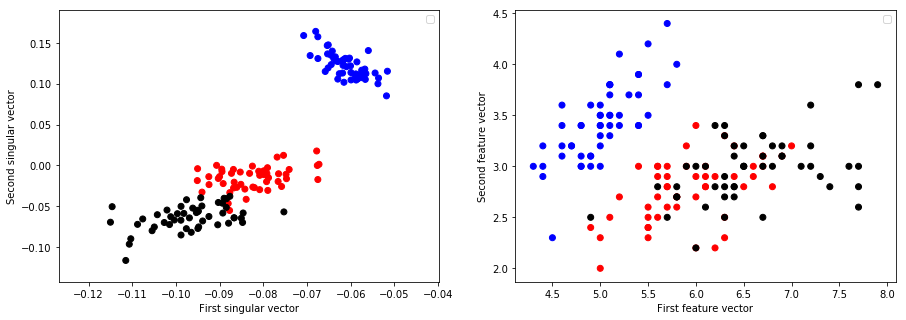

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from sklearn.datasets import load_iris

iris = load_iris()
# print(iris.feature_names, iris.target_names)
#print(iris.DESCR)
#print(iris.data)

# perform SVD
A = iris.data
U, s, V = linalg.svd(A)
print("U.shape, V.shape, s.shape: ", U.shape, V.shape, s.shape)
print("Singular values:", s)
#a = U.dot(eye())

# transform back to A
S = linalg.diagsvd(s, 150, 4)
At = np.dot(U, np.dot(S, V))
print("Closeness test: ", np.allclose(A, At))
# np.allclose?

fig, axes = plt.subplots(1, 2, figsize=(15,5))

# fig = plt.figure()
ax1 = axes[0]
colors = np.array(['blue','red','black'])
labels = np.array(['setosa','versicolour','verginica'])
ax1.scatter(U[:,0], U[:,1], color = colors[iris.target])
ax1.set_xlabel("First singular vector")
ax1.set_ylabel("Second singular vector")
ax1.legend()

ax2 = axes[1]
colors = np.array(['blue','red','black'])
labels = np.array(['setosa','versicolour','verginica'])
ax2.scatter(A[:,0], A[:,1], color = colors[iris.target])
ax2.set_xlabel("First feature vector")
ax2.set_ylabel("Second feature vector")
ax2.legend()

#### scipy.signal and scipy.fftpack: Signal theory

Signal processing is useful in order to interpret the data of many measuring instruments, especially if there is a time delayed response. We are performing a simple example, but for those that want to learn more applications of Python for signal processing I reccomend a number of online IPython courses.

- [http://nbviewer.ipython.org/github/calebmadrigal/FourierTalkOSCON/tree/master/](http://nbviewer.ipython.org/github/calebmadrigal/FourierTalkOSCON/tree/master/): Basic entry level course focused only on FFT

- [http://nbviewer.ipython.org/github/unpingco/Python-for-Signal-Processing/tree/master/](http://nbviewer.ipython.org/github/unpingco/Python-for-Signal-Processing/tree/master/): A more complex and complete course of signal processing with Python.

A small example would be a noisy signal whose frequency is unknown to the observer, who only knows the sampling time step. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The scipy.fftpack.fftfreq() function will generate the sampling frequencies and scipy.fftpack.fft() will compute the fast Fourier transform:

91
Determined frequency: 0.1998001998


/home/sergiun/programs/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


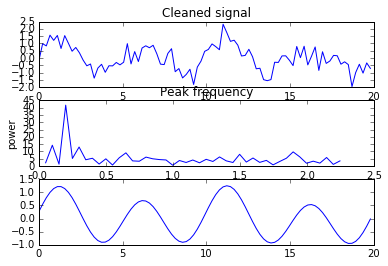

In [17]:
%matplotlib inline
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

time_step = 0.22
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size)

from scipy import fftpack

#print(sig.size)
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]
print("Determined frequency:",freq)

sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)#Discrete inverse Fourier transform

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax1.plot(time_vec,sig)
ax1.set_title('Signal')

ax2 = fig.add_subplot(312)
ax2.plot(freqs, power)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('power')
ax2.set_title('Peak frequency')

ax3 = fig.add_subplot(313)
ax3.plot(time_vec,main_sig)
ax1.set_title('Cleaned signal')

#### scipy.optimize: Local and global optimization, fitting and root finding

In the statistics chapter we use this package for line fitting. We also have a self standing optimization chapter where we will get back to this module.

We estimated the parameters of a function by performing an error minimization. An optimization problem complexity is dependent on several factors:
- Do you intend a local or a global optimization?
- Is the function linear or nonlinear?
- Is the function convex or not?
- Can a gradient be computed?
- Can the Hessian matrix be computed?
- Do we perform optimization under constraints?
Scipy does not cover all solvers efficiently but there are several Python packages specialized for certain classes of optimization problems. In general though heavy optimization is solved with dedicated programs, many of whom have language bindings for Python.

To exemplify, we use Newton's optimization to find the minima of a nonlinear function. (also covered in the optimization chapter)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 51
         Hessian evaluations: 0
[ 1.  1.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 19
         Hessian evaluations: 9
[ 1.  1.]


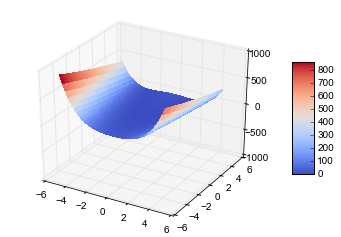

In [35]:
import numpy as np
import scipy.optimize as optimize


def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
def fprime(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))
print optimize.fmin_ncg(f, [2, 2], fprime=fprime)

def hessian(x): # Computed with sympy
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))
print optimize.fmin_ncg(f, [2, 2], fprime=fprime, fhess=hessian)

%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = .5*(1 - X)**2 + (Y - X**2)**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-1000.01, 1000.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#### scipy.interpolate: Cubic interpolation

Interpolation is useful when we have sampled a function but want to approximate its values on different points. A well known class of interpolation functions are the splines, most commonly three spline curves are combined in order to interpolate a smooth curved line between two datapoints. 

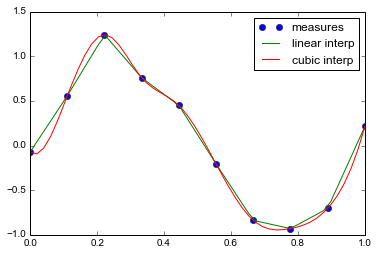

In [13]:
%matplotlib inline
import numpy as np
from scipy.interpolate import interp1d
import pylab as pl

measured_time = np.linspace(0, 1, 10)
noise = 0.1 * np.random.randn(10)
measures = np.sin(2 * np.pi * measured_time) + noise

linear_interp = interp1d(measured_time, measures)
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)

pl.plot(measured_time, measures, 'o', ms=6, label='measures')
pl.plot(computed_time, linear_results, label='linear interp')
pl.plot(computed_time, cubic_results, label='cubic interp')
pl.legend()

#### scipy.integrate: Integration and ODE solvers

This submodule is useful for summing up function values over intervals (integration) and solving ordinary differential equations. Partial differential equations are not covered and require other Python packages. As a quick example, we solve a case of Michaelis-Menten enzime kinetics.

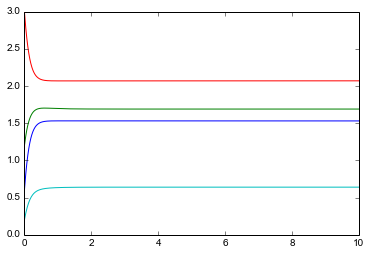

In [36]:
%matplotlib inline
#from scipy import *
import scipy.integrate as integrate

'''
Slightly modified from a sample code generated by this program, 
that formulates a solver for different cases of enzime reactions:
http://code.google.com/p/kinpy/

## Reaction ##

#Michaelis-Menten enzyme kinetics.

E + S <-> ES
ES <-> E + P

## Mapping ##

E       0        -1*v_0(y[1], y[0], y[2]) +1*v_1(y[3], y[0], y[2])
S       1        -1*v_0(y[1], y[0], y[2])
ES      2        +1*v_0(y[1], y[0], y[2]) -1*v_1(y[3], y[0], y[2])
P       3        +1*v_1(y[3], y[0], y[2])
'''

dy = lambda y, t: array([\
 -1*v_0(y[1], y[0], y[2]) +1*v_1(y[3], y[0], y[2]),\
 -1*v_0(y[1], y[0], y[2]),\
 +1*v_0(y[1], y[0], y[2]) -1*v_1(y[3], y[0], y[2]),\
 +1*v_1(y[3], y[0], y[2])\
])

#Initial concentrations:
y0 = array([\
#E
0.6,\
#S
1.2,\
#ES
3.0,\
#P
0.2,\
])

#E + S <-> ES
v_0 = lambda S, E, ES : k0 * E**1 * S**1 - k0r * ES**1
k0 = 1.2
k0r = 1.5

#ES <-> E + P
v_1 = lambda P, E, ES : k1 * ES**1 - k1r * E**1 * P**1
k1 = 0.9
k1r = 1.9

t = arange(0, 10, 0.01)
Y = integrate.odeint(dy, y0, t)

import pylab as pl

pl.plot(t, Y, label='y')

#### [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) - Image processing

This module is useful for containing functions for multidimensional image manipulation. It mainly contains filters, interpolation and morphology functions.

- https://scipy-lectures.org/advanced/image_processing/index.html
- https://scipy-lectures.org/packages/scikit-image/index.html

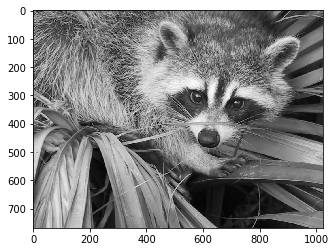

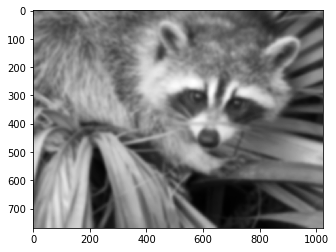

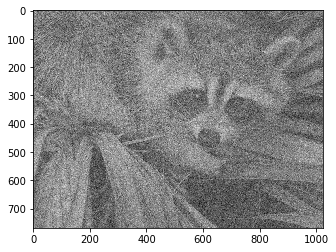

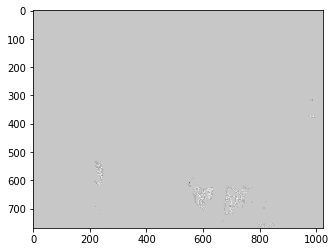

In [188]:
%matplotlib inline
import numpy as np
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import pylab as pl

koon = misc.face(gray=True)
#from scipy import misc
#face = misc.face(gray=True)
plt.imshow(koon)
plt.show()

blurred_koon = ndimage.gaussian_filter(koon, sigma=5)

plt.imshow(blurred_koon)
plt.show()

noisy_koon = np.copy(koon).astype(np.float)
noisy_koon += koon.std()*np.random.standard_normal(koon.shape)

plt.imshow(noisy_koon)
plt.show()

from scipy import signal
wiener_koon = signal.wiener(blurred_koon, (5,5))

plt.imshow(wiener_koon)
plt.show()

### Sympy

Symbolic math is sometimes important, especially if we are weak at calculus or if we need to perform automated calculus on long formulas. We are briefly going through a few test cases, to get the feel of it. Symbolic math is especially developed for [Mathematica](http://www.wolfram.com/mathematica/?source=nav), or [Sage](http://www.sagemath.org/) which is an open-source equivalent.

In [2]:
import sympy
print sympy.sqrt(8)
import math
print math.sqrt(8)

2*sqrt(2)
2.82842712475


In [11]:
from sympy import symbols
x, y, z, t = symbols('x y z t')
expr = x + 2*y
print expr
print x * expr
from sympy import expand, factor, simplify
expanded_expr = expand(x*expr)
print expanded_expr
print factor(expanded_expr)
exp = expanded_expr.subs(x, z**t)
print exp
print simplify(exp)

x + 2*y
x*(x + 2*y)
x**2 + 2*x*y
x*(x + 2*y)
2*y*z**t + z**(2*t)
z**t*(2*y + z**t)


In the scipy.optimize paragraph we needed the Hessian matrix for a function f. Here is how you can obtain it in sympy:

In [3]:
import sympy
x, y = sympy.symbols('x y')
f = .5*(1 - x)**2 + (y - x**2)**2
h = sympy.hessian(f, [x,y])
print(h)
from IPython.display import Latex
Latex(sympy.latex(h))


Matrix([[12*x**2 - 4*y + 1.0, -4*x], [-4*x, 2]])


<IPython.core.display.Latex object>

In [4]:
from IPython.display import HTML
HTML('<iframe src=http://en.wikipedia.org/wiki/Hessian_matrix width=700 height=350></iframe>')